In [9]:
from pathlib import Path
import pandas as pd
ROOT = Path('../')
ROOT.resolve()

PosixPath('/Users/lukestrange/Code/housing')

In [10]:
additional_dwellings = pd.read_csv(ROOT / 'data/additional-dwellings/csv/by_local_authority.csv')
hp_wage_ratio = pd.read_parquet(ROOT / 'data/house-prices/site/hp_to_wage_ratio.parquet')
vh = pd.read_csv(ROOT / 'data/vacant-homes/standard/AllCombined_Cleaned_2024.csv')

A small issue here is that additional dwellings data covers a 2 year period whereas wage ratio covers 1 year. We will chose the end year as the effective 'year' for the additional dwellings data

In [11]:
additional_dwellings['date'] = additional_dwellings['date'].apply(lambda s: '20'+s[-2::] if s[0:2]=='20' else '19'+s[-2::])
additional_dwellings['date'] = additional_dwellings['date'].astype(int)
additional_dwellings.rename(columns={'value': 'net_add_dwellings'}, inplace=True)

In [12]:
hp_wage_ratio['date'] = hp_wage_ratio['date'].astype(int)
hp_wage_ratio.rename(columns={'value':'wage_ratio'}, inplace=True)

In [13]:
vacant_homes = vh.copy()
vacant_homes = vacant_homes[vacant_homes['Measure'] == 'AllVacants']
vacant_homes['date'] = vacant_homes['date'].astype(int)
vacant_homes.rename(columns={'Value': 'AllVacants'}, inplace=True)

In [14]:
dwellings = vh.copy()
dwellings = dwellings[dwellings['Measure'] == 'Dwellings']
dwellings['date'] = dwellings['date'].astype(int)
dwellings.rename(columns={'Value': 'Dwellings'}, inplace=True)

In [15]:
combined = additional_dwellings.merge(hp_wage_ratio, on=['geography_code', 'date'], how='inner').merge(vacant_homes, on=['geography_code', 'date'], how='inner').merge(dwellings, on=['geography_code', 'date'], how='inner')
# combined
combined['vacants_per_thousand_dwellings'] = (1000 * combined['AllVacants'] / combined['Dwellings']).round()

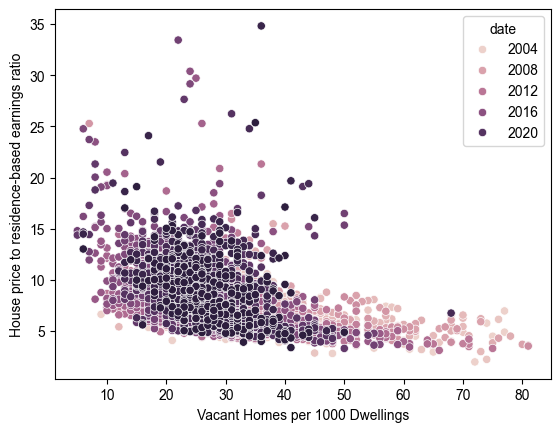

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# combined = combined[~combined.geography_code.str.startswith('E09')]
plt.rcParams["font.sans-serif"] = ["Arial"]
ax = sns.scatterplot(data=combined, x='vacants_per_thousand_dwellings', y='wage_ratio', hue='date')
ax.set(xlabel='Vacant Homes per 1000 Dwellings', ylabel='House price to residence-based earnings ratio')
plt.show()